# Handwritten Digit Classification


For this Hands-on, we will use the popular scikit-learn library to build a basic classifier. The MNIST dataset contains images of handwritten digits, and the task is to classify each image into its corresponding digit (0 to 9).

## Import Libraries

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

## Load the Dataset

**Question 1:** Load the train and test subsets of the mnist dataset from Keras

In [2]:
import tensorflow as tf

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()




11490434/11490434 [==============================] - 0s 0us/step


## Data Pre-Processing

**Question 2:**  

*   Adjust the input shape to match the one the model is expecting
*   Normalize the values of the pixels
*   Turn labels into categories using the to_categorical function

In [3]:
# Preprocess the data

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)) / 255.0
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)) / 255.0
X_train = np.array(X_train)
X_test = np.array(X_test)


y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)





## Build and train a CNN

**Question 3:** Create a Convolutional neural Network of your choice and be carefyl while you select the following:


*   input shape
*   activation function at the output layer
*   number of output neurons



In [4]:

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense



# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))





**Question 4:** Compile and train the model. Choose an appropriate loss function, optimizer, and print out the accuracy of the model.

In [ ]:
# Compile the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5
1500/1500 [==============================] - 55s 36ms/step - loss: 0.1556 - accuracy: 0.9523 - val_loss: 0.0630 - val_accuracy: 0.9827
Epoch 2/5
1500/1500 [==============================] - 51s 34ms/step - loss: 0.0490 - accuracy: 0.9845 - val_loss: 0.0512 - val_accuracy: 0.9843
Epoch 3/5
1500/1500 [==============================] - 50s 33ms/step - loss: 0.0328 - accuracy: 0.9895 - val_loss: 0.0479 - val_accuracy: 0.9867
Epoch 4/5
1500/1500 [==============================] - 51s 34ms/step - loss: 0.0244 - accuracy: 0.9923 - val_loss: 0.0415 - val_accuracy: 0.9887
Epoch 5/5
1500/1500 [==============================] - 49s 33ms/step - loss: 0.0167 - accuracy: 0.9946 - val_loss: 0.0365 - val_accuracy: 0.9900


## Evaluate the Model's performance

**Question 5:** Plot the training and validation accuracy to better understand the performance of the model.

313/313 [==============================] - 7s 21ms/step - loss: 0.0313 - accuracy: 0.9902
Test Accuracy: 0.9901999831199646


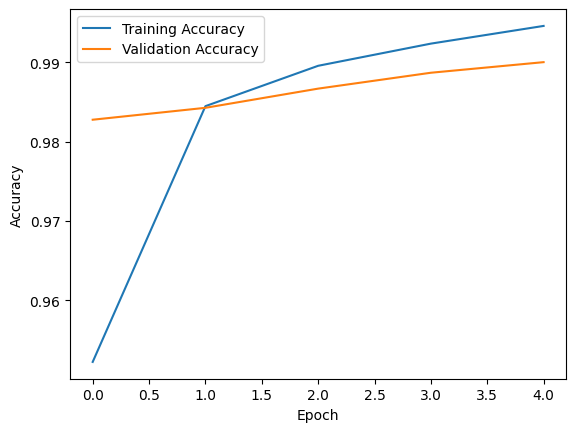

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Plot the training and validation accuracy over epochs

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
